# Lab 2.8: Tree Based Methods

In this case, we will be conduct a simpler exercise with decision trees using previous implementations. In particular, we will make use of several implemented methods in ML libraries s.a. `sklearn` (_that should be good news for you, doesn't it?_). With this, we will try to explore the main characteristics of decision trees, that you will also have to explore in the more theoretical part of the lab (the other exercise, the one on the pdf).

We will begin, as usual, importing the relevant libraries:

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode


# ML libraries to construct, use and analyse the trees
from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from io import StringIO
from IPython.display import Image  
from sklearn.metrics import mean_squared_error, confusion_matrix
import pydotplus

from sklearn.metrics import mean_squared_error

We will first apply this to a regression dataset so that you see the way the model is constructed for this case 

## Regression Tree

For starters, let us try out a regression tree. To that end, first load the `Hitters.csv` dataset from the `data` 
folder.

In [87]:
hitters  = pd.read_csv("Hitters.csv")# (make sure you remove the None values!)

# Print the columns here to check their names
print(hitters.columns)

Index(['Player', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')


For this first case, we will only use the variables `Years` and `Hits` for the tree. Our target variable will be `Salary`. Separate them into `X` and `y`

In [88]:
# Separate the independent variables (X) from the dependent one (y - salary)
 
X = hitters[["Years", "Hits"]]
y = hitters["Salary"]

Construct a _decision tree regressor_ using the `sklearn` function and fit it. To do that, check out the `DecisionTreeRegressor` in sklearn and implement it here.

For reproducibility, fix the `random_state` to `0` and the `max_leaf_nodes` to `3` (make sure you know what this last thing does!)

In [89]:
# Construct the regressor

regressor = DecisionTreeRegressor(max_leaf_nodes = 3)

X_filled = X.fillna(X.mean())
y_filled = y.fillna(y.mean())
X_train, X_test, y_train, y_test = train_test_split(X_filled, y_filled, test_size=0.2, random_state=0)

# Fit it with the .fit method
regressor.fit(X=X_train, y=y_train) 

DecisionTreeRegressor(max_leaf_nodes=3)

Now we will employ some functions engrained in `StringIO` alongside the method `export_graphviz` from the `tree` object in sklearn. This will enable us to visualize the constructed tree.

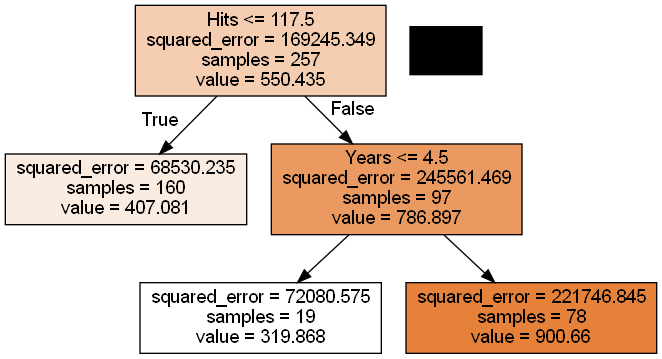

In [90]:
dot_data = StringIO()
export_graphviz(regressor, 
                out_file=dot_data, 
                feature_names=['Years', 'Hits'], 
                filled=True, 
                class_names=None)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

> Question: Describe the previous tree. What do you see? Do you think this will work well? Respond **briefly**

Este modelo es muy simple, lo que puede generar un alto sesgo y no capturar bien relaciones complejas en los datos. Puede ser útil para entender tendencias generales, pero probablemente no tendrá un gran desempeño predictivo.


Now we will plot the decision regions using the information on the cuts. Add lines wherever needed so that you can see the decision boundaries for the regression tree above

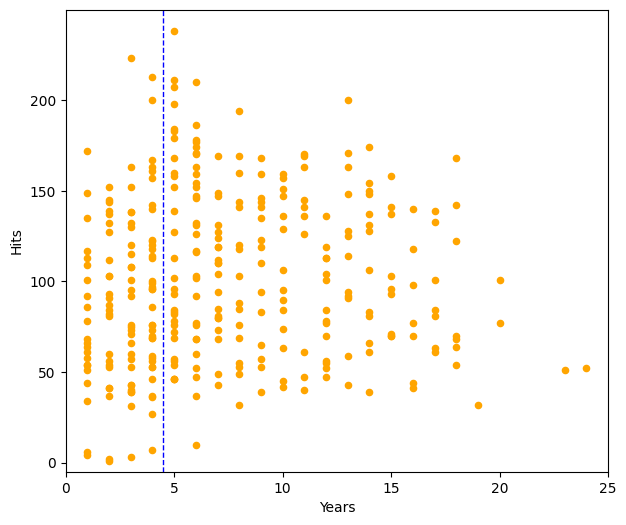

In [91]:
hitters.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)

# Add whatever you may need here to clearly plot the decision boundaries 

puntos_corte = regressor.tree_.threshold
for corte in puntos_corte:
    plt.axvline(x=corte, color='blue', linestyle='--', linewidth=1)

plt.show()

## Tree Size

Now, for the previous part we limited the growth of the tree so that we recovered a simple (but easily interpretable) tree. Now we will go all-out: we will construct a more exhaustive tree using different variables. For this particular case, let us use **all variables except** `League`, `Division`, `NewLeague` and `Salary` as independent variables to predict, precisely, the `Salary` value. 

In [92]:
# Construct the input variable dataset
X = hitters[["AtBat", "Hits", "HmRun", "Runs", "RBI", "Walks", "Years",
             "CAtBat", "CHits", "CHmRun", "CRuns", "CRBI", "CWalks",
             "PutOuts", "Assists", "Errors"]]

y = hitters["Salary"]

# Print the column names to check
print(X.columns)

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'],
      dtype='object')


We will now perform the train/test split, but we will do it so that the proportion of train and test examples is $50\%$ (that is, train and test consist on $50\%$ of the datapoints).

In [93]:
# Perform the train-test split here. Do it so that the  

X_filled = X.fillna(X.mean())
y_filled = y.fillna(y.mean())

x_train, x_test, y_train, y_test = train_test_split(X_filled, y_filled, test_size=0.5, random_state=0) # TODO: Fill the NAs, fixing also the random_state to 0 for reproducibility

Now, train the tree to its fullest extent: put no limits on the growth and see what happens. You can re-use some of the previous `graphviz` code to visualize the tree here. Plot the complete tree.

In [94]:
# Train the tree without limits to its growth (random_state = 0)
unlimited_tree_regressor = DecisionTreeRegressor()
unlimited_tree_regressor.fit(x_train, y_train) 

DecisionTreeRegressor()

Reuse the code you need to plot the tree here


(process:29896): GLib-GIO-WARNING **: 18:09:00.234: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2024.111.100_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs



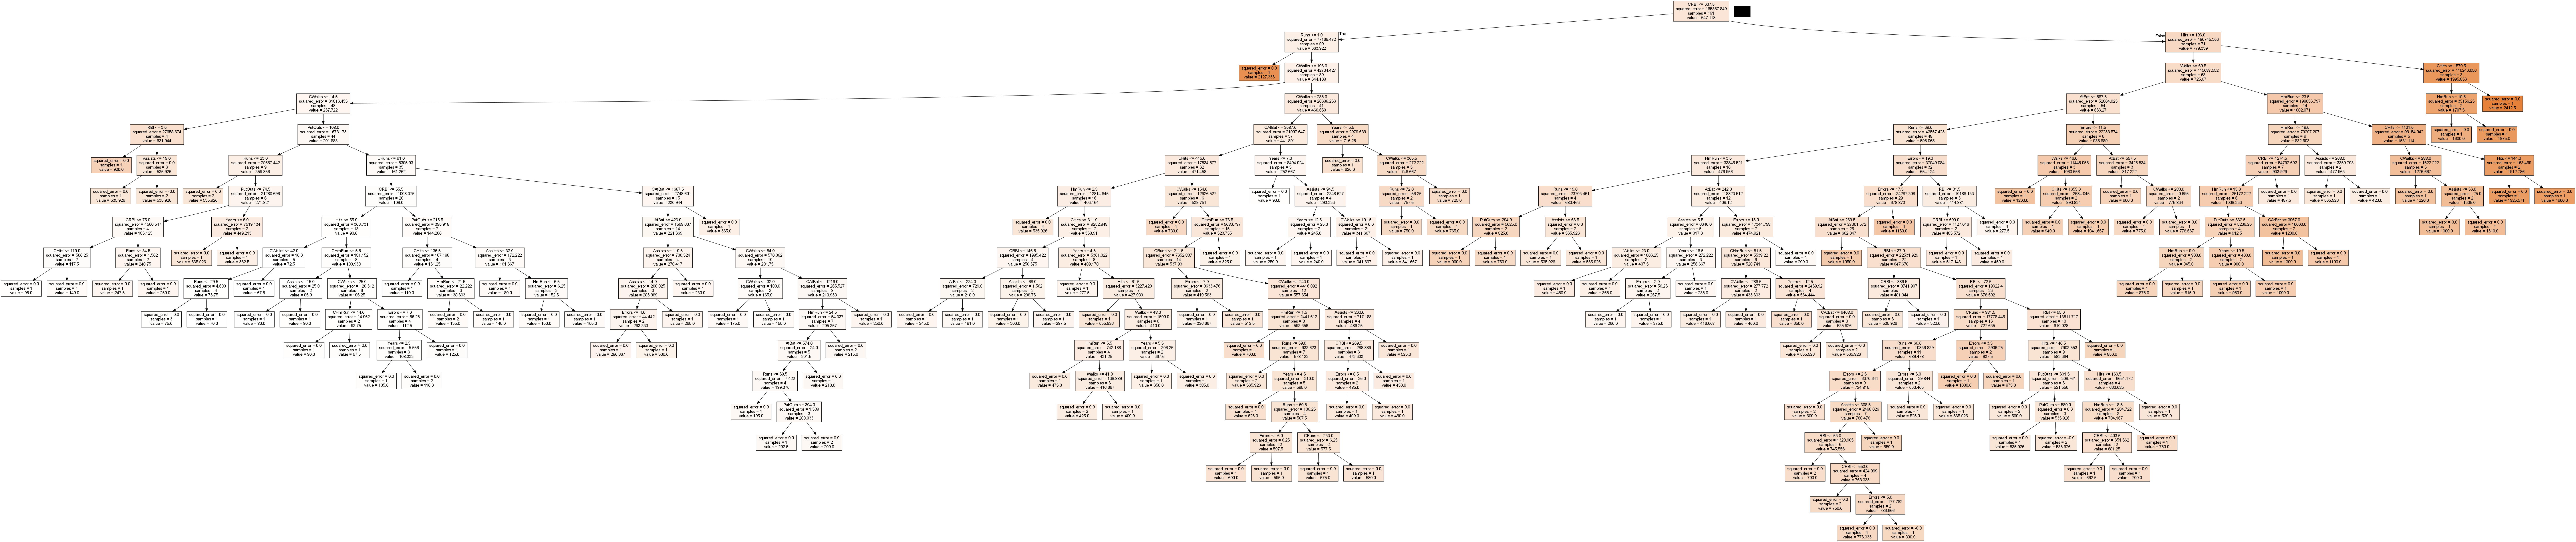

In [95]:
# Your code here!

dot_data = StringIO()
export_graphviz(unlimited_tree_regressor, 
                out_file=dot_data, 
                feature_names=["AtBat", "Hits", "HmRun", "Runs", "RBI", "Walks", "Years",
             "CAtBat", "CHits", "CHmRun", "CRuns", "CRBI", "CWalks",
             "PutOuts", "Assists", "Errors"], 
                filled=True, 
                class_names=None)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


> Question: What do you see? What can you say about this tree? Does it have any important properties?

El árbol mostrado es el resultado de entrenar un DecisionTreeRegressor sin restricciones, lo que significa que ha crecido hasta su máxima profundidad, dividiendo los datos en cada posible punto. Esto probablemente ha llevado a un sobreajuste (overfitting), donde el modelo se ajusta demasiado a los datos de entrenamiento y puede no generalizar bien. Su estructura jerárquica muestra cómo se han realizado las divisiones en función de la variable objetivo. Los nodos resaltados podrían indicar puntos clave en la segmentación de los datos. Un árbol tan grande suele necesitar poda (pruning) o restricciones para mejorar la capacidad de generalización.

Maybe we went _a bit too far_ with the tree... Let's set up some limitations to see everything better. Try setting the `max_features` to 9, and the `max_depth` to 4. (_It is important you understand what these parameters do! Check out the documentation in the [library](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)_)

In [96]:
regressor_2 =  DecisionTreeRegressor(max_features=9, max_depth=4)
regressor_2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, max_features=9)

Reuse the code you may need to plot the tree here

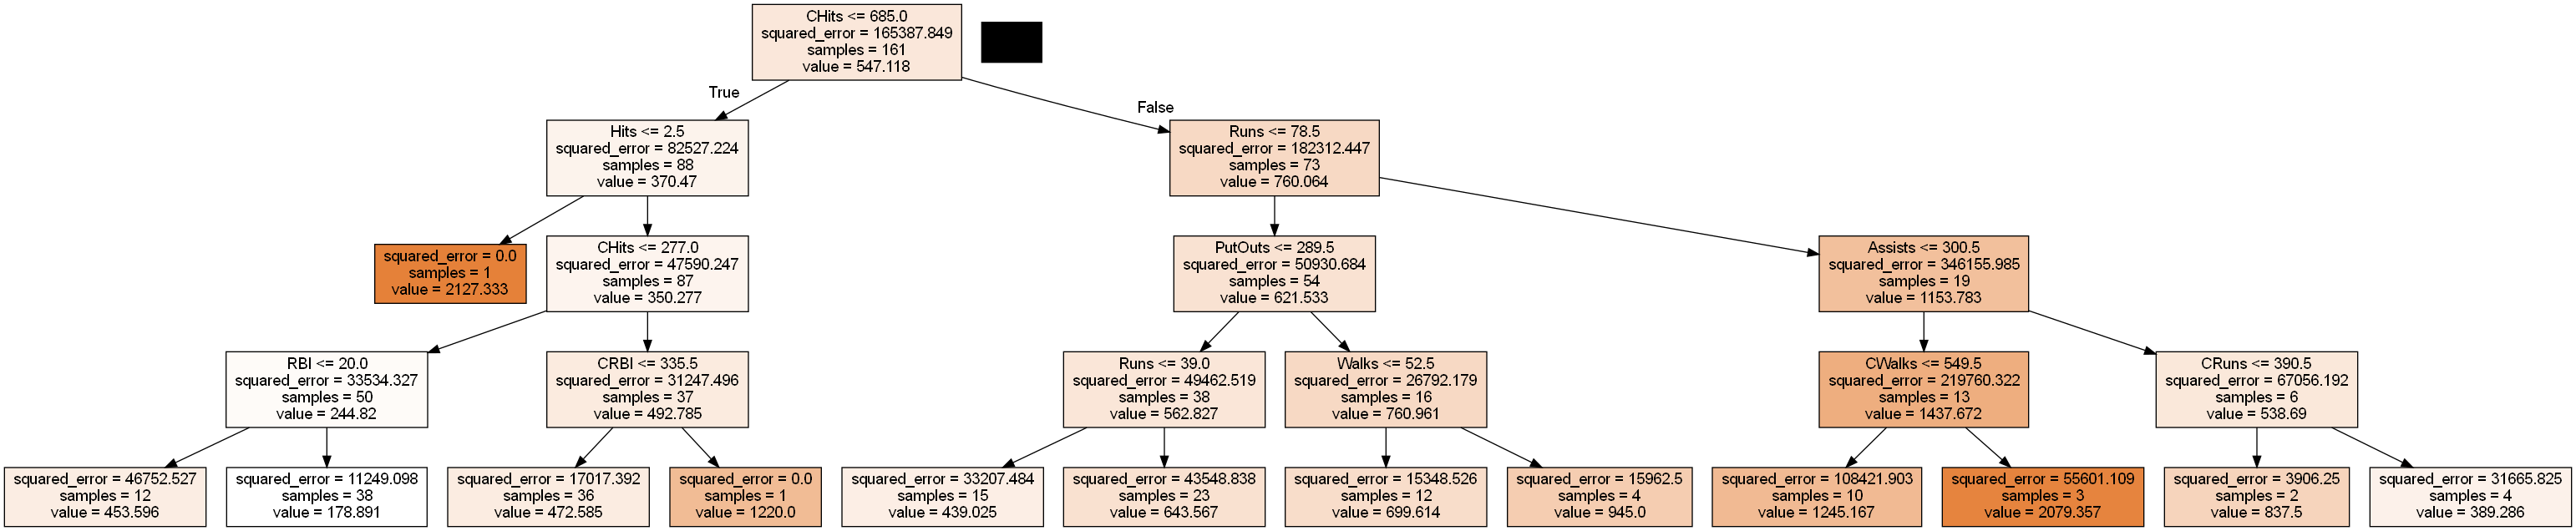

In [97]:
# Your code here!

dot_data = StringIO()
export_graphviz(regressor_2, 
                out_file=dot_data, 
                feature_names=["AtBat", "Hits", "HmRun", "Runs", "RBI", "Walks", "Years",
             "CAtBat", "CHits", "CHmRun", "CRuns", "CRBI", "CWalks",
             "PutOuts", "Assists", "Errors"], 
                filled=True, 
                class_names=None)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Let us see if this tree works well at all... Since we are performing regression, we can obtain the RMSE (we use the Root MSE since it shares the same dimensions of the outputs):

In [98]:
predictions = regressor_2.predict(x_test) # Obtain the predictions for x_test

# Print the RMSE for the predictions

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RSME:", rmse)

RSME: 375.93077785764194


Now, the question is: how do we know which tree depth to select here? As you may expect, the answer is, as almost always here, performing _cross validation_. In this particular instance we will not conduct exhaustive cross validation. Instead, we will do it in a very simple manner, obtaining *a single tree* for each depth value we want, fitting it to the data and seeing how well does it perform both in train and test  fitted to the data. To do this, do the following:
* Fit a **fixed max depth** (`i`) decision tree regressor using *all `x_train` variables*. Also, *fix the `random state` to 1* for reproducibility.
* Register its train and test RMSEs
* Plot the train and test RMSE curves for each `i` depth  

Make sure that you explore _enough_ depth values. 

Text(0, 0.5, 'Root Mean Squared Error')

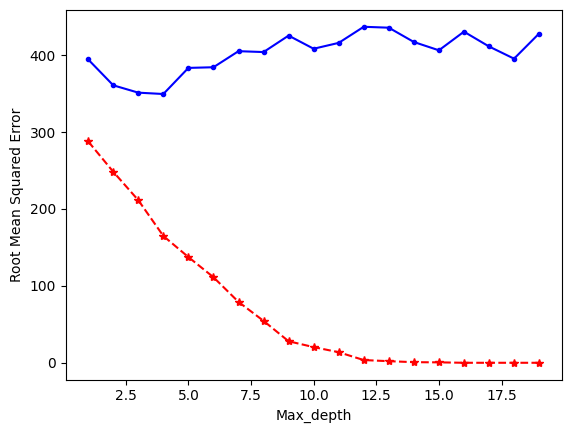

In [ ]:
# Lists to store the results
train_rmse = []
test_rmse = []

# Range of depths to be explored
tree_size = np.arange(1,20)
x_train, x_test, y_train, y_test = train_test_split(X_filled, y_filled, test_size=0.5, random_state=1)

for i in tree_size:

    # Train the needed tree with the set depth, then measure its RMSE in train and test and store them in the previous lists
    regressor_i = DecisionTreeRegressor(max_depth=i, )
    regressor_i.fit(x_train, y_train)
    y_train_pred = regressor_i.predict(x_train)
    y_test_pred = regressor_i.predict(x_test)
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Plot the results
plt.plot(tree_size, train_rmse, 'r*--')
plt.plot(tree_size, test_rmse, 'b.-')
plt.xlabel('Max_depth')
plt.ylabel('Root Mean Squared Error')


> Question: What do you see here? What depth value would you select?

La gráfica resultante muestra que el RMSE disminuye a medida que aumenta la profundidad hasta un punto óptimo, alrededor de una profundidad máxima de 10, donde el RMSE del conjunto de prueba es más bajo antes de que comience a aumentar nuevamente. Este punto representa un buen equilibrio entre sesgo y varianza, indicando que una profundidad máxima de 10 es una elección adecuada para minimizar el error sin sobreajustar los datos.



Since we are not really making CV, we do not have multiple values for the train and test RMSE for each tree. Therefore, we *do not* have errorbars in the previous plot. That should raise some suspicions from your part. 

> Question: What happens if we change the `random_state` value? Are the previous results robust?

Observamos que los resultados no son completamente robustos, ya que el RMSE cambia significativamente con distintos random_state. Esto indica que la elección del random_state puede afectar la estabilidad y reproducibilidad de los resultados. Por lo tanto, es importante realizar múltiples pruebas con diferentes random_state para asegurar que los resultados sean consistentes y no dependan de una configuración específica.

To answer the previous question you can try out code in the next cell. Feel free to try whatever you think is needed here.

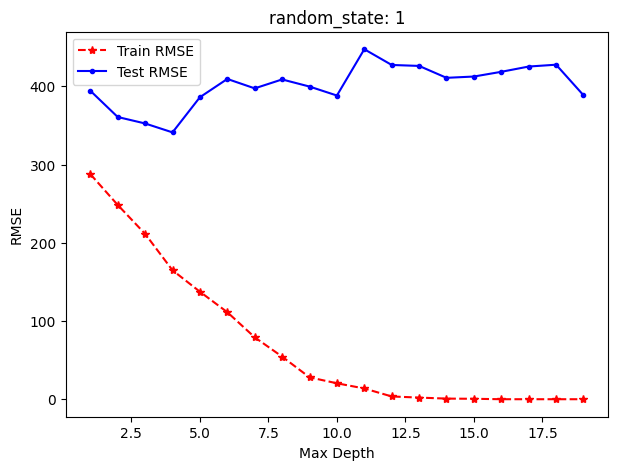

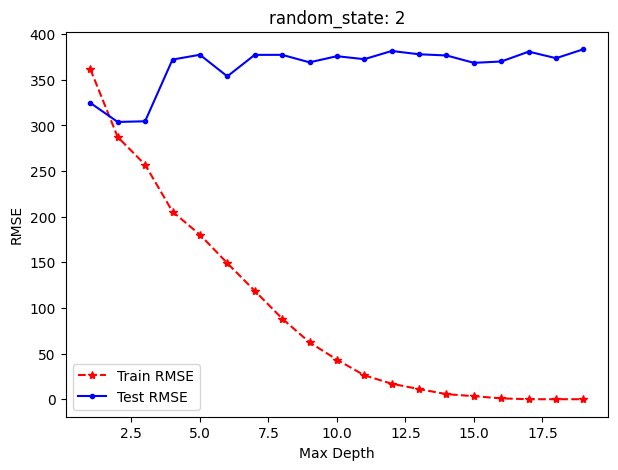

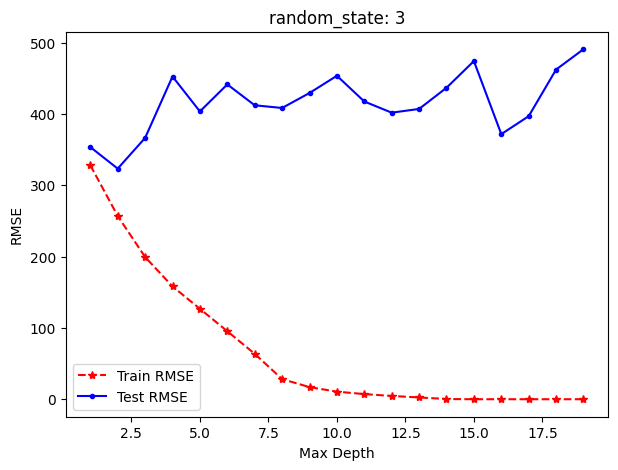

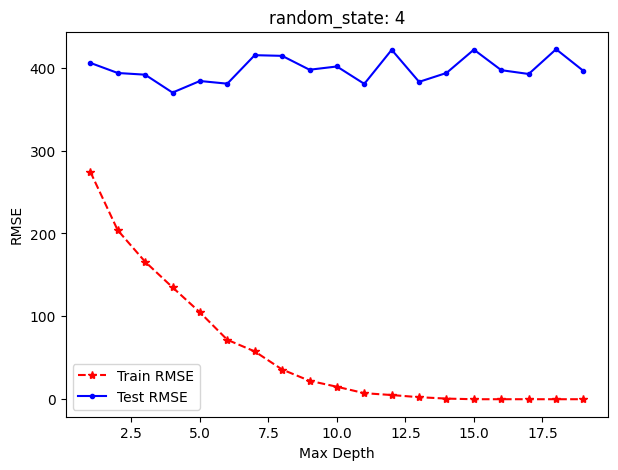

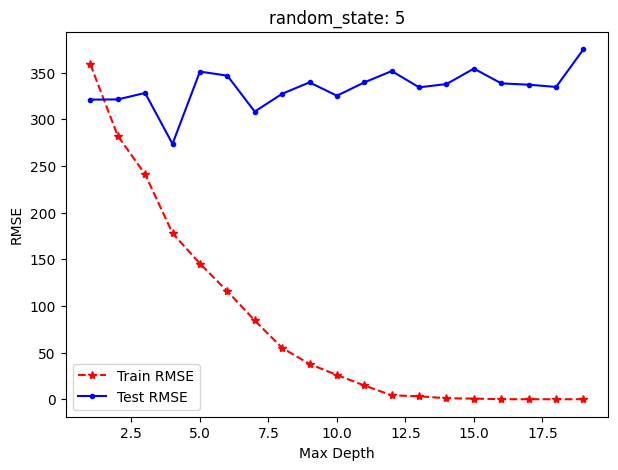

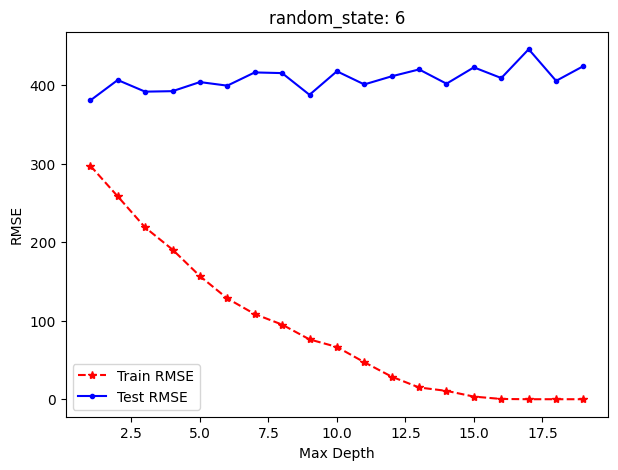

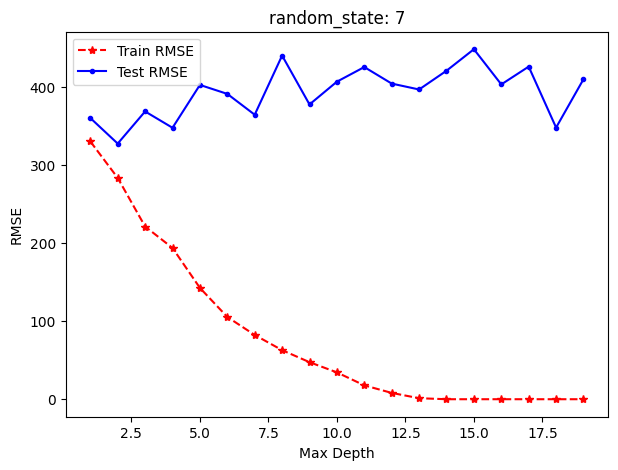

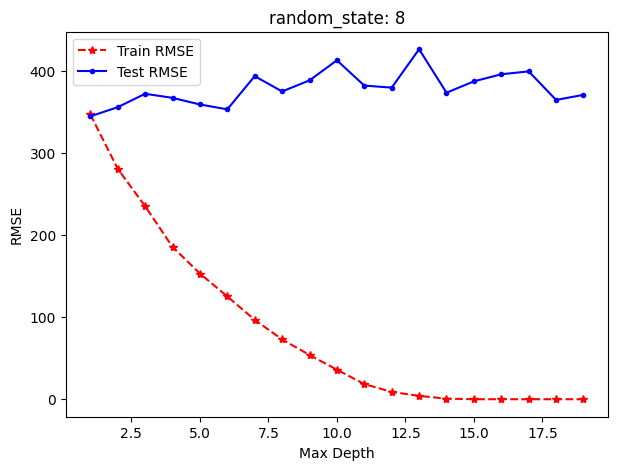

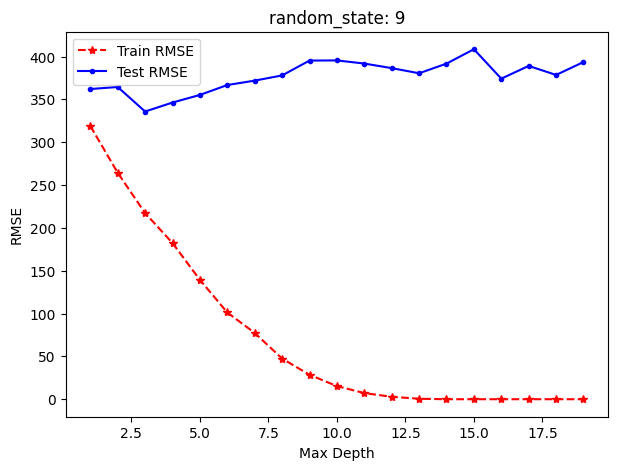

In [102]:
for j in range(1, 10):  # Generar 9 figuras independientes
    # Lists to store the results
    train_rmse = []
    test_rmse = []

    # Range of depths to be explored
    tree_size = np.arange(1, 20)
    x_train, x_test, y_train, y_test = train_test_split(X_filled, y_filled, test_size=0.5, random_state=j)

    for i in tree_size:
        # Train the needed tree with the set depth, then measure its RMSE in train and test and store them in the previous lists
        regressor_i = DecisionTreeRegressor(max_depth=i)
        regressor_i.fit(x_train, y_train)
        y_train_pred = regressor_i.predict(x_train)
        y_test_pred = regressor_i.predict(x_test)
        train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    # Crear una nueva figura para cada gráfico
    plt.figure(figsize=(7, 5))
    plt.plot(tree_size, train_rmse, 'r*--', label="Train RMSE")
    plt.plot(tree_size, test_rmse, 'b.-', label="Test RMSE")
    plt.xlabel("Max Depth")
    plt.ylabel("RMSE")
    plt.title(f"random_state: {j}")
    plt.legend()
    plt.show()


In order to get more acquainted with the results, check out what happens if you include less  `x_train` features. To do so, change what you need from the previous block of code and put it in the next block here.
> Question: Do you see any important changes? How do you explain this?  

La gráfica muestra cómo el Error Cuadrático Medio (RMSE) de entrenamiento y prueba varía con diferentes cantidades de características (x_train). Observamos que al reducir el número de características, el RMSE tiende a aumentar, especialmente en el conjunto de prueba. Esto sugiere que incluir menos características puede llevar a un modelo menos preciso y más propenso a errores, ya que se pierde información relevante que podría ayudar a mejorar las predicciones. En resumen, reducir las características puede disminuir la capacidad del modelo para capturar la complejidad de los datos, resultando en un rendimiento inferior

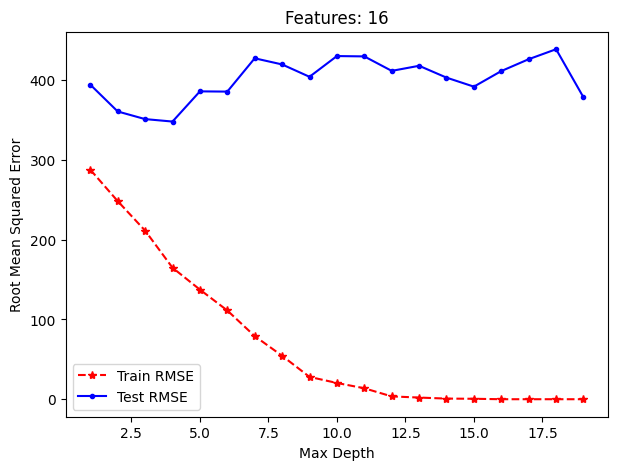

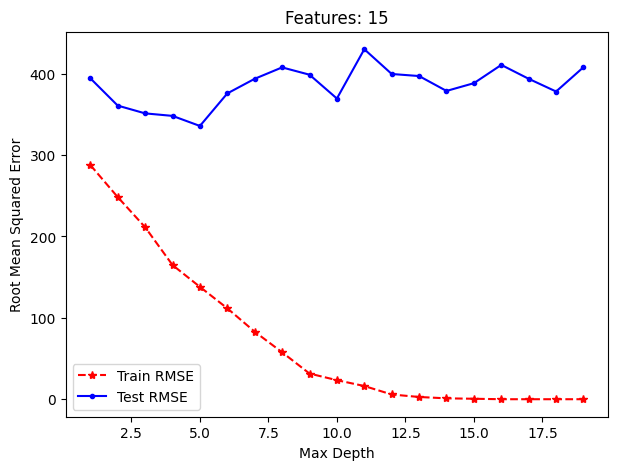

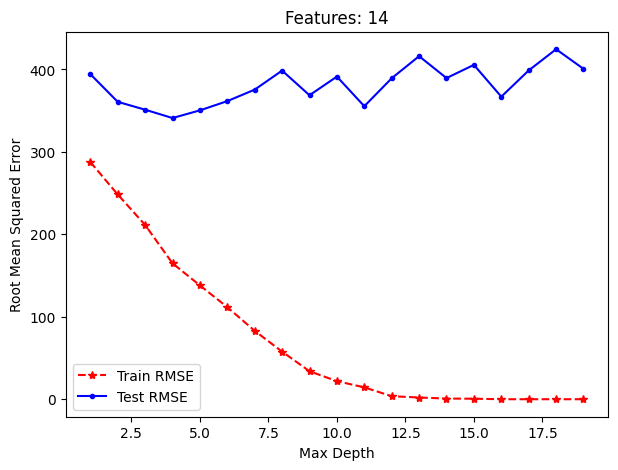

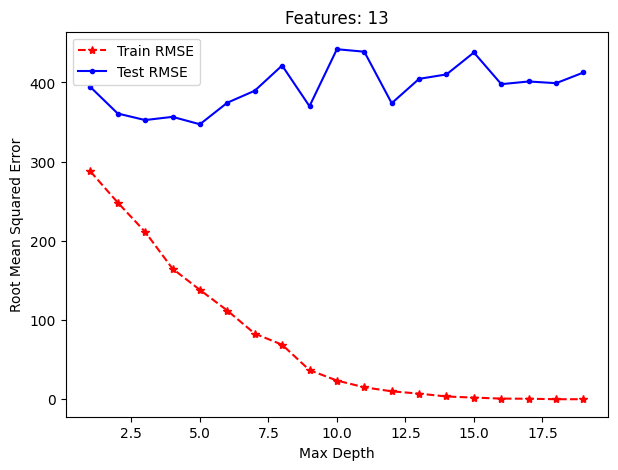

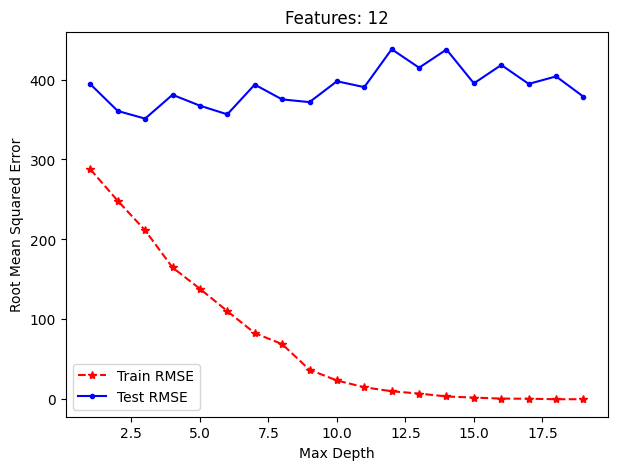

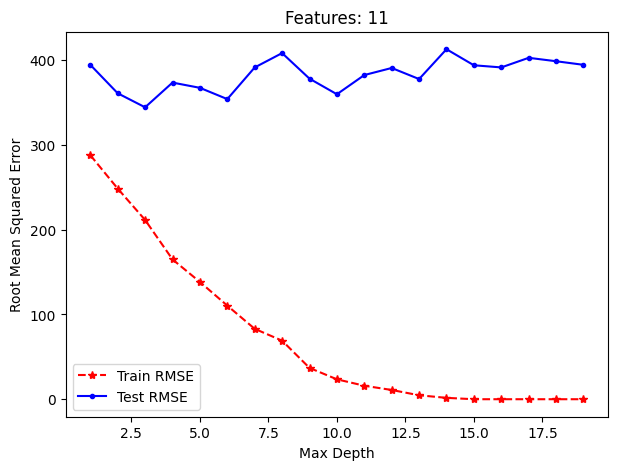

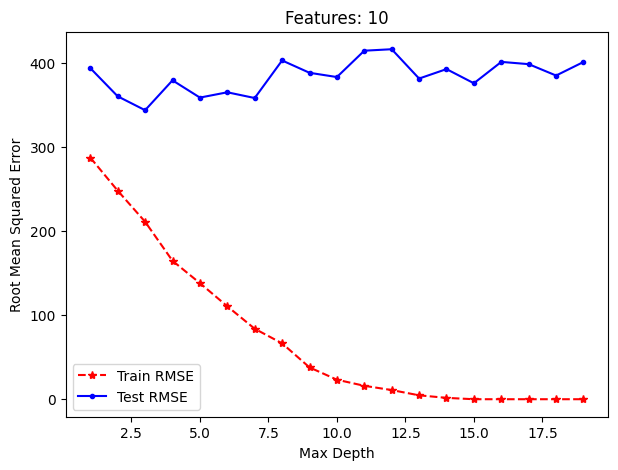

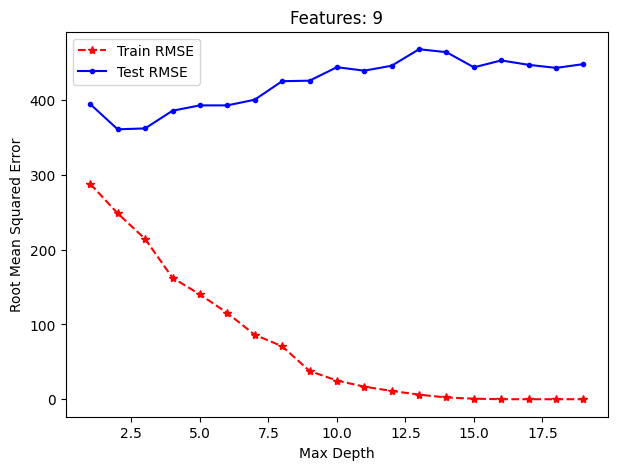

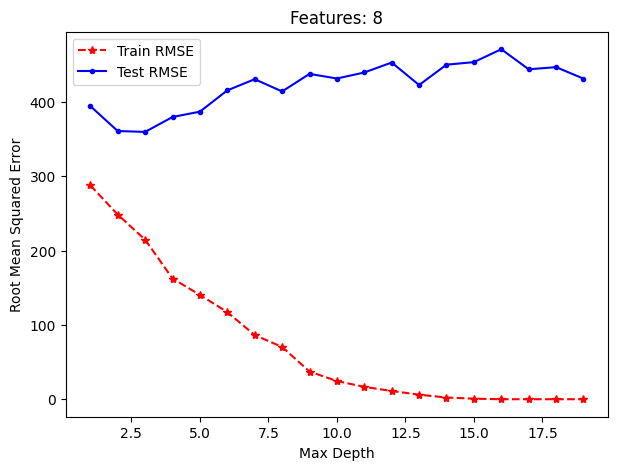

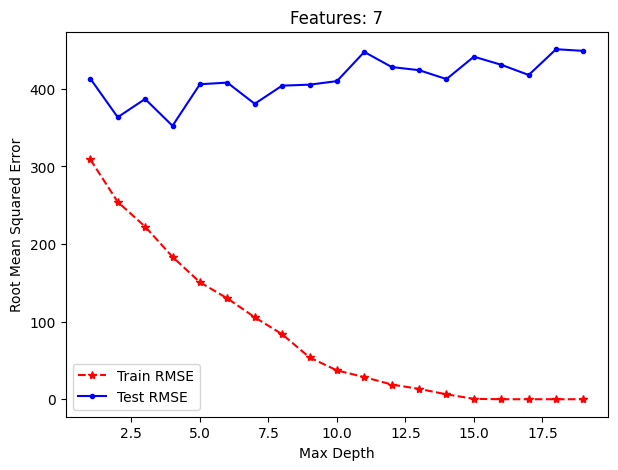

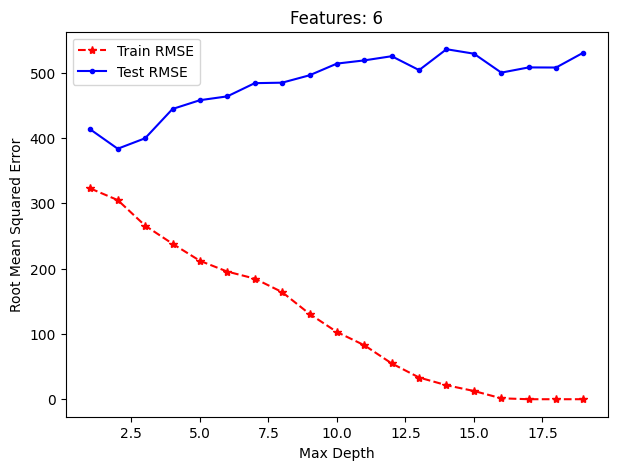

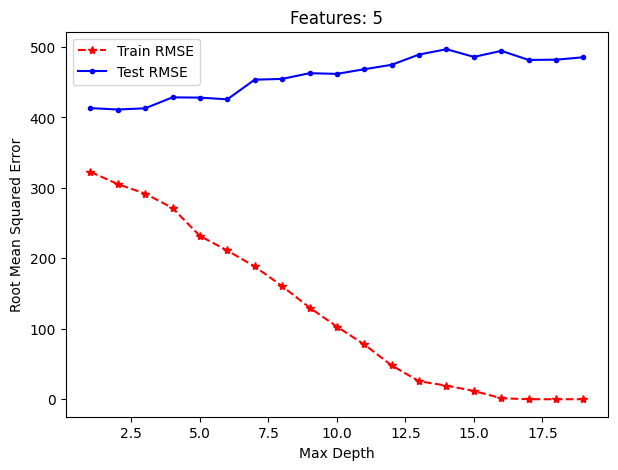

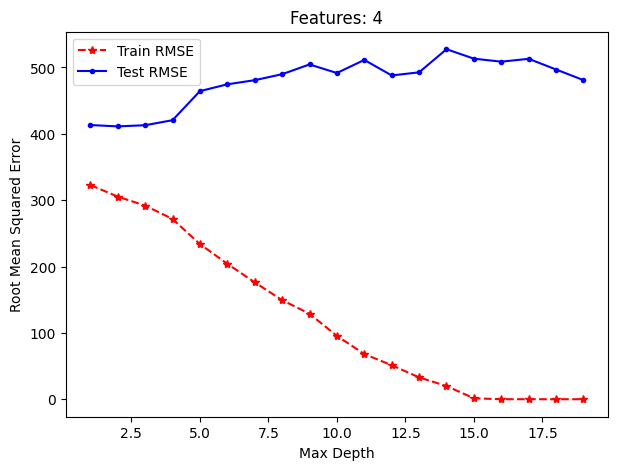

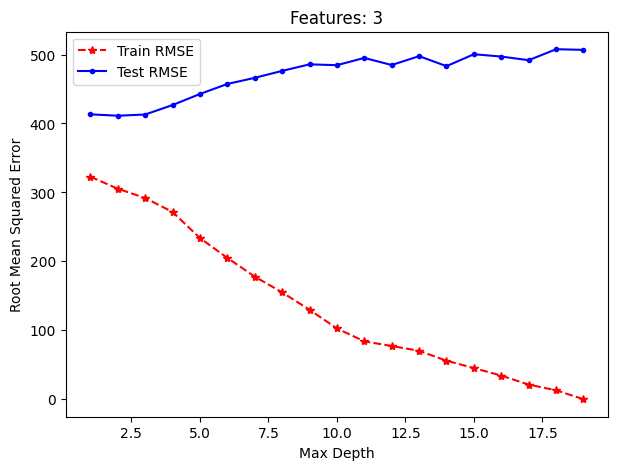

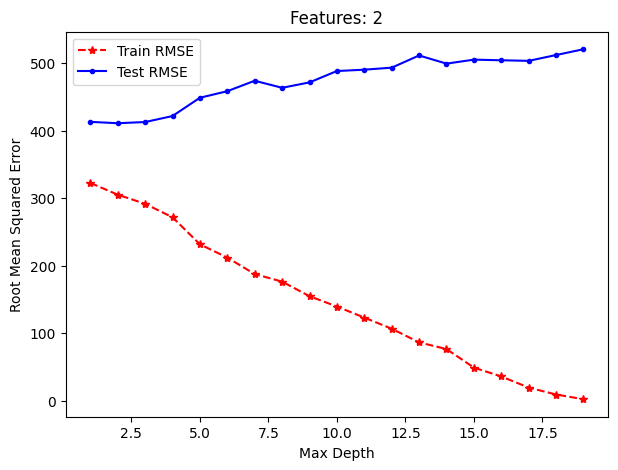

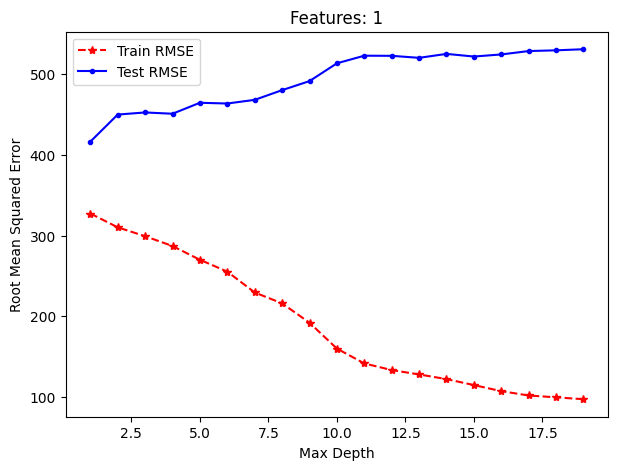

In [103]:
# Your code here!

for j in range(len(X_filled.columns), 0, -1):
    x_filled = X_filled.iloc[:, :j] 
    x_train, x_test, y_train, y_test = train_test_split(x_filled, y_filled, test_size=0.5, random_state=1)

    # Lists to store the results
    train_rmse = []
    test_rmse = []

    # Range of depths to be explored
    tree_size = np.arange(1, 20)

    for i in tree_size:
        # Train the needed tree with the set depth, then measure its RMSE in train and test and store them in the previous lists
        regressor_i = DecisionTreeRegressor(max_depth=i)
        regressor_i.fit(x_train, y_train)
        y_train_pred = regressor_i.predict(x_train)
        y_test_pred = regressor_i.predict(x_test)
        train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    # Crear una nueva figura para cada gráfico
    plt.figure(figsize=(7, 5))
    plt.plot(tree_size, train_rmse, 'r*--', label="Train RMSE")
    plt.plot(tree_size, test_rmse, 'b.-', label="Test RMSE")
    plt.xlabel("Max Depth")
    plt.ylabel("Root Mean Squared Error")
    plt.title(f"Features: {j}")
    plt.legend()
    plt.show()

## Classification Tree

In order to complete this practical exercises with trees, we will also try out some classification trees to later do ensembles. Let us see how this works. 

First, load the `Carseat.csv` dataset from `data` (make sure to remove the NAs, as before)

In [107]:
# Load the dataset (remove the NAs)

carseats = pd.read_csv("Carseat.csv")
carseats = carseats.dropna()
carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

Make it so that we have a new binary variable called `high`. This variable should be `1` when `sales` are over 8, and `0` otherwise.

In [109]:
# Crear una nueva columna 'high' en el DataFrame carseats
high_values = []

# Iterar sobre cada valor en la columna "Sales"
for sale in carseats["Sales"]:
    if sale > 8:
        high_values.append(1)
    else:
        high_values.append(0)

# Asignar la lista de valores a la nueva columna
carseats["high"] = high_values

# Mostrar los nombres de las columnas del DataFrame
column_names = carseats.columns
print(column_names)

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'high'],
      dtype='object')


Convert the remaining variables to make them usable here

The variables `ShelveLoc`, `Urban` and `US` need to be converted to categorical variables to be correctly used. To that end, I suggest you use `pd.factorize` (although feel free to do as you will here...)

In [111]:
# Your code here!
for columna in ["ShelveLoc", "Urban", "US"]:
    carseats[columna] = pd.factorize(carseats[columna])[0]

Now, we will employ all variables to predict the `high` value (except `Sales` and `high`, for obvious reasons). Note that we have essentially converted a _regression_ problem into a _binary classification_ one.

In [112]:
# Drop the unwanted columns
X = carseats.drop(["Sales", "high"], axis=1)

# Select the "high" column
y = carseats["high"] 

# TODO: Performn the train/test split with again 50% data for train and 50% for test 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.5, random_state = 0)

Construct a decision tree classifier. To control for the depth, we will fix it to a *maximum depth of 6*. Use as impurity criteria the **Gini index**.

In [ ]:
carseats_classifier = DecisionTreeClassifier(max_depth=6, random_state=0)  # Fill the NAs. Fix the random_state to 0

# Train the model with .fit
carseats_classifier.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=6, random_state=0)

Plot the tree (again, reuse whatever you may need here)

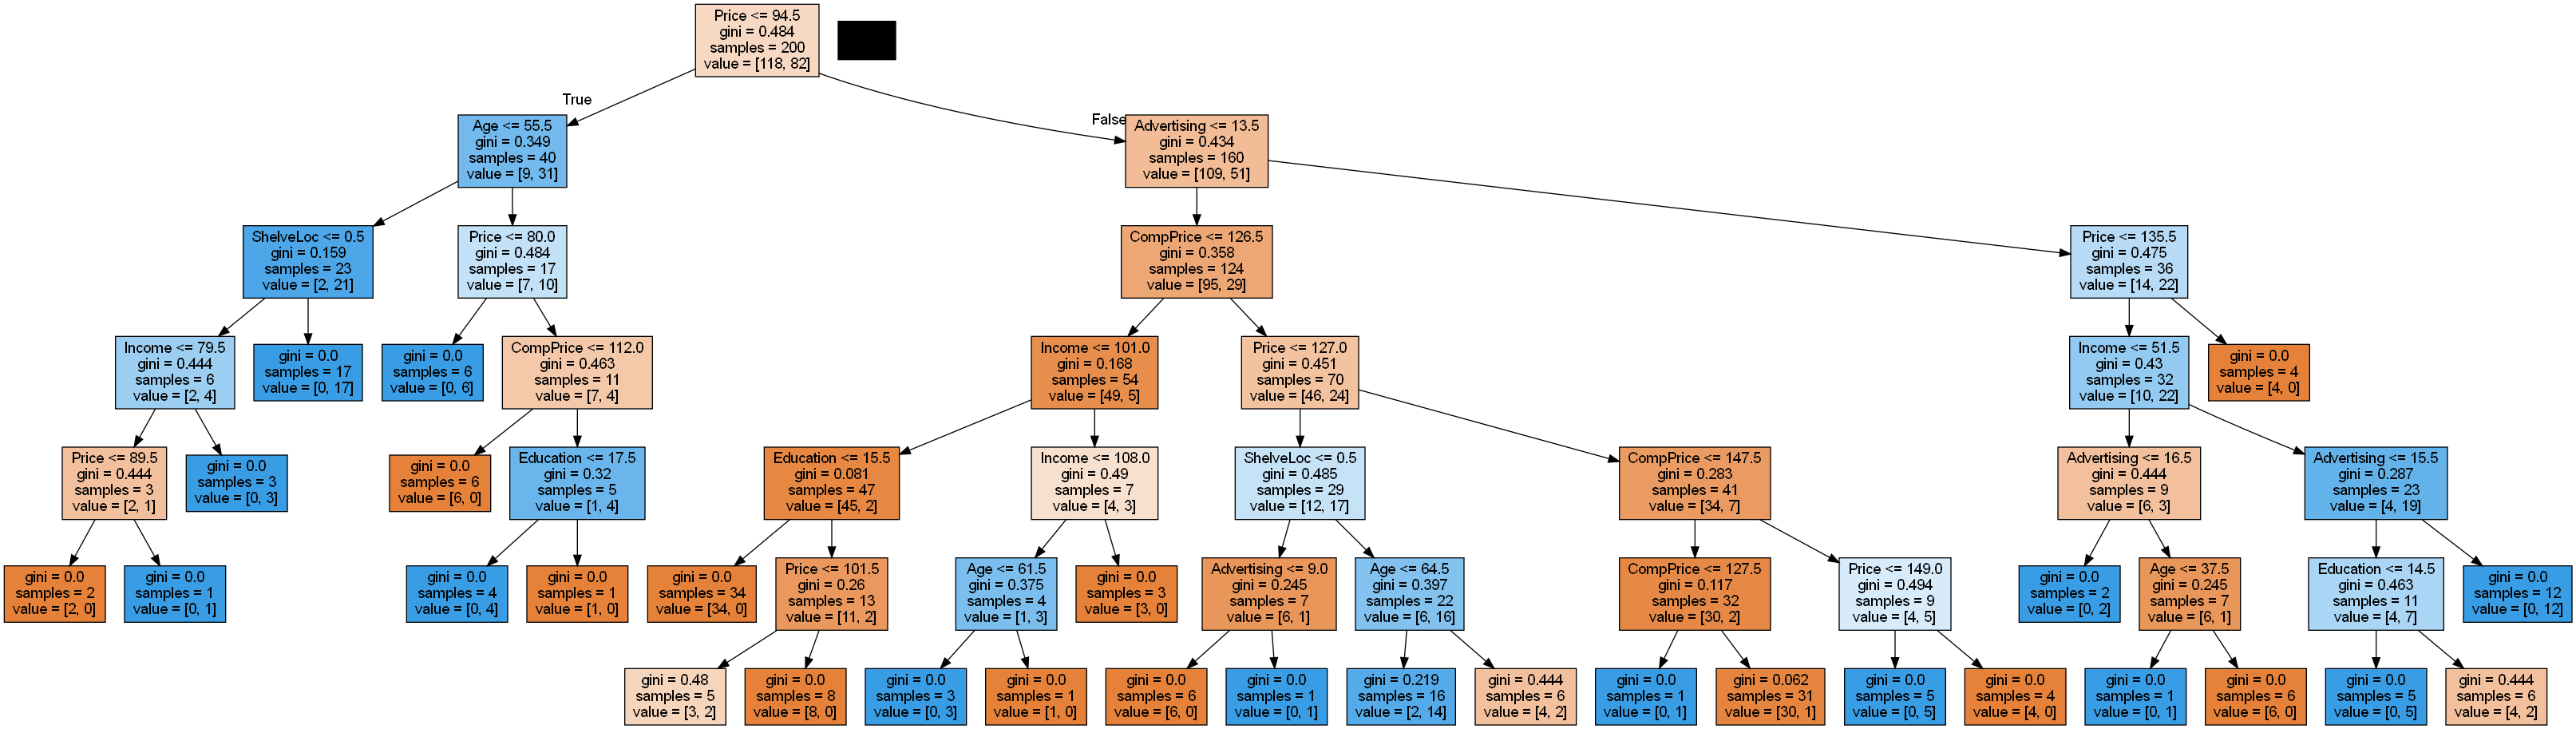

In [114]:
# Your code here!

dot_data = StringIO()
export_graphviz(carseats_classifier, 
                out_file=dot_data, 
                feature_names=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
                              'ShelveLoc', 'Age', 'Education', 'Urban', 'US'], 
                filled=True, 
                class_names=None)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Let us now assess the quality of the tree. To that end, **represent the confusion matrix** for the test data

In [115]:
# Your code here!

y_test_pred = carseats_classifier.predict(X_test)
test_matrix = confusion_matrix(y_test, y_test_pred)
print(test_matrix)

[[101  17]
 [ 32  50]]


> Questions: 
> * What is the **precision** of this tree?

La precisión de este árbol la cálculomos como el cociente entre los verdaderos positivos y la suma de los verdaderos positivos con los falsos positivos. Dicha operación es la siguiente: 101/(101+32) = 0.76. Esto significa que el árbol de decisión tiene una precisión del 76%, lo que indica que el modelo es bastante bueno para identificar correctamente los positivos.

> * Do you consider the dataset balanced?

No, el conjunto de datos no está equilibrado ya que hay una diferencia significativa entre el número de positivos totales (101 + 17 = 118) y negativos totales (32 + 50 = 82).

# Ensembles

Now we will try out some of the ensemble methods from class. Remember there is an stochastic component embedded in these for the most part, so we may not recover exactly the same results twice depending on how you implement things.

## Bagging

The decision tree models mentioned above usually suffers from high variance. **B**ootstrap **agg**regation, or **bagging** usually helps with this issue. To do bagging here, we will do it both by hand and by employing the sklearn function.

First, let's go with the *by-hand* implementation

In [167]:
# Set the bagging parameters
n_estimators = 10  # Number of decision trees in the ensemble
max_samples = 0.8  # Proportion of samples to be used for each bootstrap sample

# Store the predictions
predictions = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

for _ in range(n_estimators):

    # Create a bootstrap sample
    sample_indices = np.random.choice(X_train.shape[0], size=int(X_train.shape[0] * max_samples), replace=True) # Muestreo aleatorio con remplazamiento
    X_bootstrap = X_train.iloc[sample_indices]
    y_bootstrap = y_train.iloc[sample_indices]
    
    
    # Train a decision tree classifier on the bootstrap sample
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_bootstrap, y_bootstrap)
    
    # Make predictions on the test set using the trained decision tree
    # TODO: Obtain the predictions for X_test
    y_pred = decision_tree.predict(X_test)
    predictions.append(y_pred)

# Combine predictions
# For classification, you can use majority voting
# TODO: Obtain the majority vote for each instance
modes = mode(predictions, axis=0, keepdims=True)
majority_vote = modes.mode[0]

# For regression, you can use averaging
# combined_predictions = np.(predictions, axis=0)  # For classification, use np.mean for voting

accuracy = np.mean(majority_vote == y_test)
print(f"Bagging Accuracy: {accuracy}")

Bagging Accuracy: 0.73


Print the confusion matrix

In [168]:
# Your code here! Use majority_vote and y_test

confusion_matrix_test = confusion_matrix(y_test, majority_vote)
print(confusion_matrix_test)

[[102  16]
 [ 38  44]]


Let's see how this is done in `sklearn`... Fit it and show the confusion matrix

In [152]:
bagging = BaggingClassifier(random_state=0, n_estimators=10, max_samples=0.8) # Create a BaggingClassifier (fix random_state to 0)

# Train it with the training data
bagging.fit(X_train, y_train)

# Obtain the predictions
bagging_pred = bagging.predict(X_test)

# Print the confusion matrix (use the confusion_matrix function)

confusion_matrix_test = confusion_matrix(y_test, bagging_pred)
print(confusion_matrix_test)

[[100  18]
 [ 35  47]]


We will use the `sklearn` implementation to study the variable importance. *Make sure you understand how this is done!*

<Figure size 1000x600 with 0 Axes>

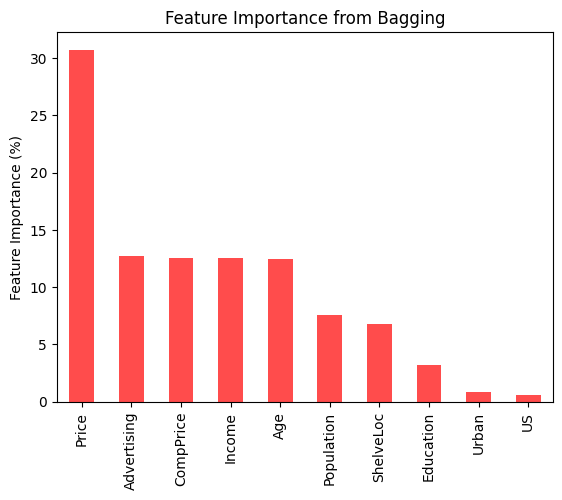

In [173]:
# Calcular la importancia de las características
importances = np.mean([model.feature_importances_ for model in bagging.estimators_], axis=0)

# Crear un DataFrame con las importancias
importance_df = pd.DataFrame({'Importance': importances * 100}, index=X.columns)

# Ordenar los valores de mayor a menor
importance_df = importance_df.sort_values('Importance', ascending=False)

# Graficar con barras verticales
plt.figure(figsize=(10, 6))
importance_df.plot(kind='bar', color='red', legend=False, alpha=0.7)
plt.ylabel('Feature Importance (%)')
plt.title('Feature Importance from Bagging')
plt.show()


> Question: What do you see here?

La gráfica muestra la importancia de diferentes características del modelo de bagging. Las características están ordenadas de mayor a menor importancia, destacando que "Price" es la más influyente con un porcentaje de importancia del 30% aproximadamente. Esto sugiere que el factor precio es crucial en el model mientras que otras caracteristicas como "Urban" o "US" tienen una menor influencia

## Random Forest

We will also do this in the RF case. First, we will implement it by hand. Feel free to use the previous code and modify it as you may see fit to do RF here!

In [174]:

# RF parameters
n_estimators = 10  # Number of decision trees in the forest
max_features = 0.8  # Proportion of features to consider for each split

# Train decision trees with random feature selection and make predictions
predictions = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

for _ in range(n_estimators):

    # Construct your own RF ensemble! Reuse the Bagging code and change whatever you may need here

    # Creamos una muestra de bootstrap
    sample_indices = np.random.choice(X_train.shape[0], size=int(X_train.shape[0] * max_samples), replace=True) # Muestreo aleatorio con remplazamiento
    X_bootstrap = X_train.iloc[sample_indices]
    y_bootstrap = y_train.iloc[sample_indices]

    # Muestra aleatoria
    feature_indices = np.random.choice(X_train.shape[1], size=int(X_train.shape[1] * max_features), replace=True) # Subconjunto aleatorio con remplazamiento
    X_features = X_bootstrap.iloc[:, feature_indices]
    X_test_features = X_test.iloc[:, feature_indices]    
    
    # Entrenamos un decision tree classifier en la muestra de bootstrap
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_features, y_bootstrap)
    
    # Hacemos predicciones en el conjunto de test usando el árbol de decisión entrenado
    # Obtenemos las predicciones para X_test
    y_pred = decision_tree.predict(X_test_features)
    predictions.append(y_pred)


# Finalmente, combinamos las predicciones usando majority voting
majority_vote = mode(predictions, axis=0, keepdims=True).mode[0]

accuracy = np.mean(majority_vote == y_test)
print(f"RF Accuracy: {accuracy}")

RF Accuracy: 0.75


Print the confusion matrix

In [175]:
# Your code here!
confusion_matrix_test = confusion_matrix(y_test, majority_vote)
print(confusion_matrix_test)

[[107  11]
 [ 39  43]]


Let us do it again with `sklearn` so you see the differences... Show the confusion matrix. In this last part there may be some differences with your run, which are due to the randomness of the classifiers constructed. Do not worry too much about it here.

In [176]:
# TODO: Construct the RF classifier with RandomForestClassifier. Fix the random_state to 0, n_estimators to 10 and max_features to 0.8
rf = RandomForestClassifier(random_state=0, n_estimators=10, max_features=0.8)

# Train it
rf.fit(X_train, y_train)

# Predict the test values
rf_pred= rf.predict(X_test)

# Obtain the confusion matrix and print it
confusion_matrix_test = confusion_matrix(y_test, rf_pred)
print(confusion_matrix_test)


[[103  15]
 [ 34  48]]


Using again the `sklearn` implementation, we will study the feature importance

<Axes: >

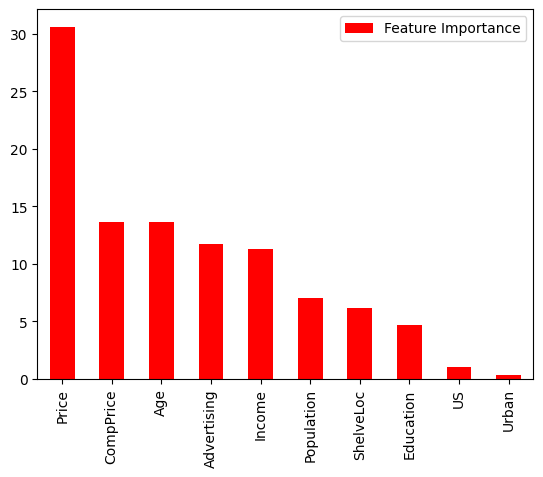

In [177]:
rf_featureImportance= pd.DataFrame({'Feature Importance':rf.feature_importances_*100}, index= X.columns)
rf_featureImportance.sort_values('Feature Importance', ascending=False).plot(kind='bar', color='red')

> Question: Given the models thus far (simple tree, bagging and RF), which one would you choose and why?

Elegiría el modelo de Random Forest (RF) porque ofrece un mejor equilibrio entre sesgo y varianza en comparación con un árbol de decisión simple o el método de Bagging.

El árbol de decisión simple es fácil de interpretar, pero tiende a sobreajustarse a los datos de entrenamiento, lo que lo hace menos generalizable.

Bagging reduce la varianza al entrenar múltiples árboles de decisión y promediar sus predicciones, lo que mejora la estabilidad del modelo. Sin embargo, cada árbol se entrena de manera independiente sin optimizar características específicas.

## Extra: Boosting

In order to fully complete our review of the ensemble methods from class, we are missing the **Boosting method**. In order to keep matters simple, we will implement it here with `sklearn` so that you get to see what it looks like...

In [179]:
# Import the model
from sklearn.ensemble import GradientBoostingClassifier

# Create the Boosting model
gb= GradientBoostingClassifier(n_estimators = 5000, random_state = 1, max_depth = 2)

# If you want to try it out, you can change reuse most of previous codes to run it here!

# Train it
gb.fit(X_train, y_train)

# Predict the test values
gb_pred= gb.predict(X_test)

# Obtain the confusion matrix and print it
confusion_matrix_test = confusion_matrix(y_test, gb_pred)
print(confusion_matrix_test)

[[106  12]
 [ 22  60]]


The results are pretty good! Keep in mind that this is achieved with super weak learners s.a. trees with depth 2. It is quite fast, and super easy to use with `sklearn`. We can also study the variable importance in this case.

<Axes: >

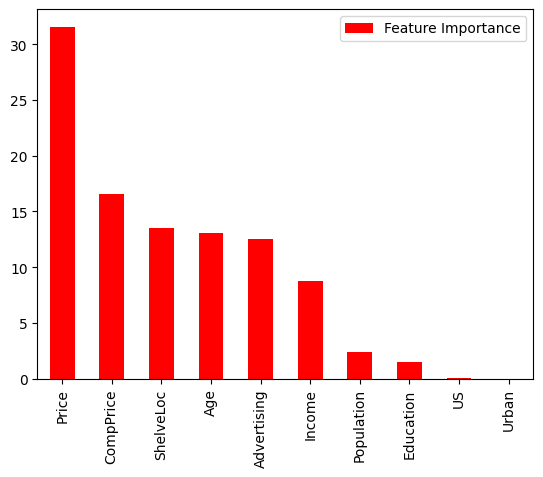

In [180]:
gb_featureimportance= pd.DataFrame({'Feature Importance': gb.feature_importances_*100}, index= X.columns)
gb_featureimportance.sort_values('Feature Importance', ascending=False).plot(kind='bar', color='red')

If you want to see how this can be implemented easily by hand, you can use the following code. We are using an implementation that follows a description of Boosting mode similar to the one given in the ISLR book

In [ ]:
# Initialize the parameters
n_estimators = 1000  # Number of decision trees in the ensemble
learning_rate = 0.1  # Learning rate for each decision tree

# Initialize the weights for the training samples
sample_weights = np.ones(len(X_train)) / len(X_train)

# Train decision trees with weighted samples and make predictions
predictions = []
for _ in range(n_estimators):

    # Train a decision tree classifier on the weighted training samples
    decision_tree = DecisionTreeClassifier(max_depth = 2)
    decision_tree.fit(X_train, y_train, sample_weight=sample_weights)

    # Make predictions on the test set using the trained decision tree
    y_pred = decision_tree.predict(X_test)
    predictions.append(y_pred)

    # Calculate error
    incorrect = (y_pred != y_test).astype(int)
    error = np.sum(sample_weights * incorrect) / np.sum(sample_weights)

    # Update sample weights
    alpha = learning_rate * np.log((1 - error) / error)
    sample_weights *= np.exp(alpha * incorrect)

# Combine predictions
# For classification, you can use weighted voting
combined_predictions = np.zeros(len(X_test))
for prediction in predictions:
    combined_predictions += prediction

# Evaluate the performance of the boosting ensemble
# TODO: This can be done with the previous codes you had already. Reuse them here to see the result!